In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("D:\#DATA Science\Feature Engineering\Cleaned_data_for_model.csv")
df.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [4]:
df.columns

Index(['Unnamed: 0', 'property_type', 'price', 'location', 'city', 'baths',
       'purpose', 'bedrooms', 'Area_in_Marla'],
      dtype='object')

In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
df["city"].value_counts()

city
Karachi       37066
Lahore        26221
Islamabad     22243
Rawalpindi    11738
Faisalabad     2231
Name: count, dtype: int64

In [7]:
df = df[df["city"] == "Islamabad"]

In [8]:
df.isnull().sum()

property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

In [9]:
from scipy import *
from scipy import stats

### Check if the data is normalized or not

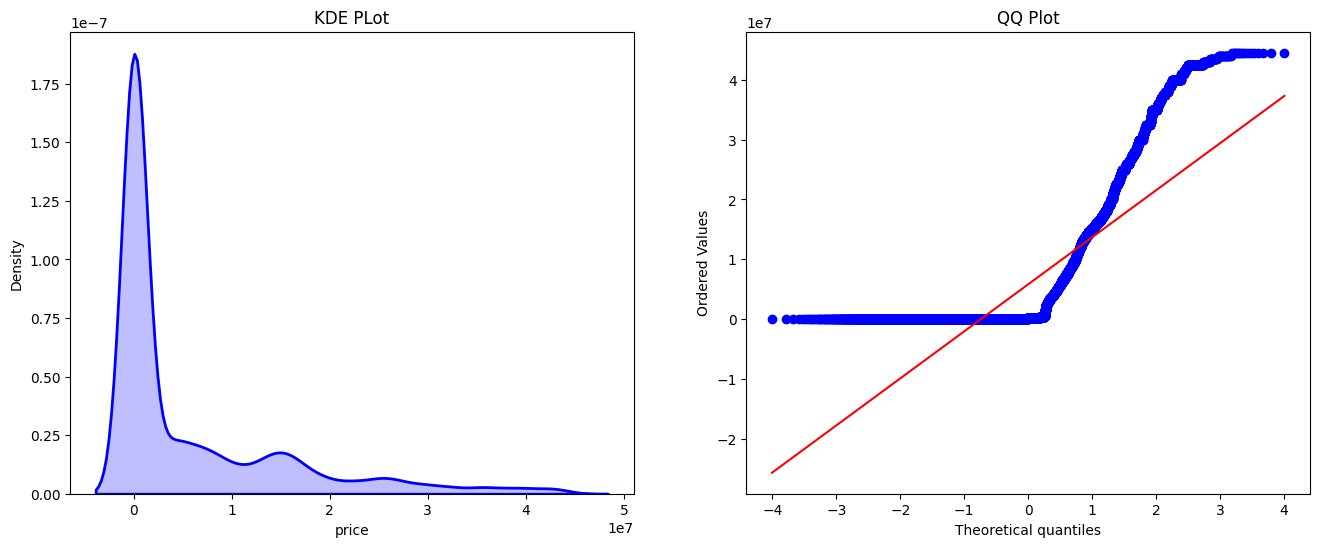

In [10]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.kdeplot(df["price"], color='blue', fill=True, linewidth=2,legend=True)
plt.title("KDE PLot")



plt.subplot(1,2,2)
stats.probplot(df["price"], plot=plt)
plt.title("QQ Plot")


plt.show()

##### KDE and QQ-plot is showing the data of price is left skewed so we have to normalize it

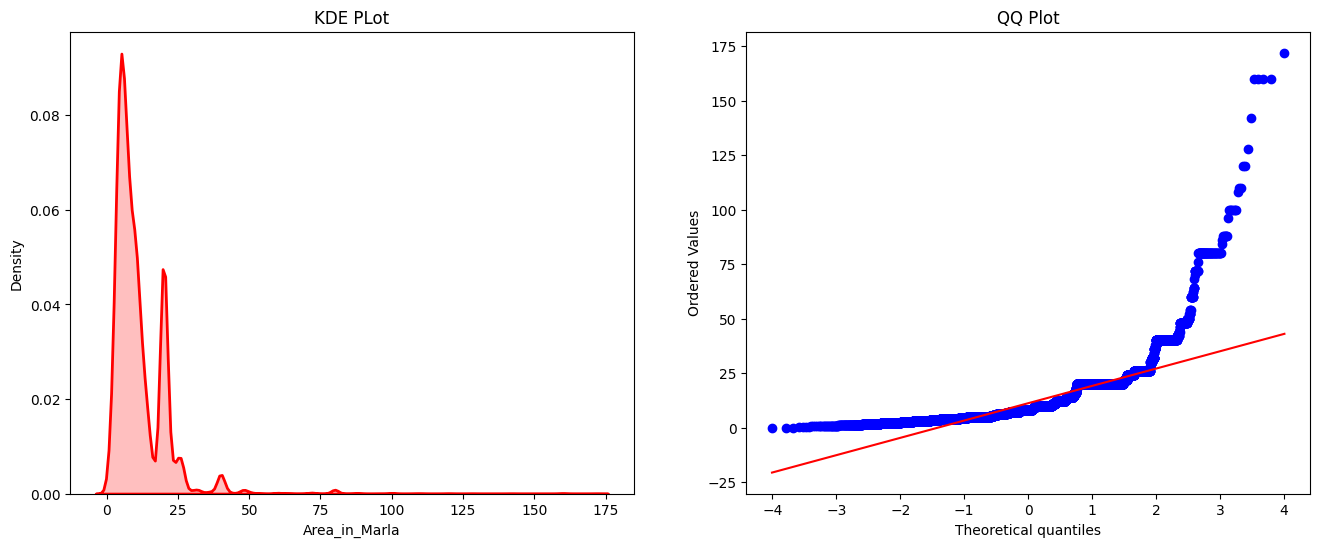

In [11]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.kdeplot(df["Area_in_Marla"], color='red', fill=True, linewidth=2,legend=True)
plt.title("KDE PLot")



plt.subplot(1,2,2)
stats.probplot(df["Area_in_Marla"], plot=plt)
plt.title("QQ Plot")

plt.show()

### So area in marla column also not normaly distributed

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [13]:
X = df[['baths', 'bedrooms', 'Area_in_Marla']]
y = df['price']

In [14]:
X.shape

(22243, 3)

In [15]:
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
train_x.shape
train_y.shape

(17794,)

In [17]:
mlr = LinearRegression()
mlr.fit(train_x, train_y)


LinearRegression()

In [18]:
mlr.coef_,mlr.intercept_

(array([1643714.26629807, 1570099.08273674, -285823.97228847]),
 -1961805.610594225)

In [19]:
y_pred = mlr.predict(test_x)

In [20]:
print(mean_squared_error(test_y,y_pred))

74830081179323.03


### model is not performing well due to u normalized data

In [21]:
from sklearn.metrics import r2_score
r2_score(test_y,y_pred)

0.2106063709194298

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='squared_error', splitter='best',random_state=42)
dtr.fit(train_x,train_y)

DecisionTreeRegressor(random_state=42)

In [23]:
y_hat = dtr.predict(test_x)

### So we see that the model is not doing good beacause of un normalized data

In [24]:
r2_score(test_y, y_hat)

0.3017009858564431

## lets use function transformers for data normalization

In [25]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(np.log1p)
trf1 = FunctionTransformer(np.reciprocal)

In [26]:
train_x_trans = trf.fit_transform(train_x)
train_y_trans = trf.fit_transform(train_y)

In [27]:
test_x_trans = trf.fit_transform(test_x)
test_y_trans = trf.fit_transform(test_y)

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=100,random_state=42)
dtr.fit(train_x_trans,train_y_trans)

DecisionTreeRegressor(max_depth=100, random_state=42)

In [29]:
y_hat = dtr.predict(test_x_trans)

In [30]:
r2_score(test_y_trans, y_hat)

0.32541841623099077

### So when we normalized the data the accuracy ups withh 2%